## 01. Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# Import JSONfile
country_geo = r'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 6/02 Data/Original Data/us-states.json'

In [4]:
country_geo

'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 6/02 Data/Original Data/us-states.json'

In [5]:
# Set path
path = 'C:/Users/jeong/OneDrive/Desktop/CF Files/Achievement 6'

In [6]:
# Import data
df_food_surplus = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'food_surplus_cleaned.csv'))

In [7]:
# Check df
df_food_surplus.head(50)

,Unnamed: 0,year,state,sector,sub_sector,sub_sector_category,food_type,tons_surplus,tons_supply,us_dollars_surplus,...,tons_incinerated,tons_land_application,tons_landfilled,tons_sewer,tons_refuse_discards,upstream_mtco2e_footprint,downstream_mtco2e_footprint,total_mtco2e_footprint,gallons_water_footprint,meals_wasted
0,0,2021,Alabama,Farm,Not Applicable,Not Applicable,Dry Goods,8314.881697,320214.881700,3.883810e+06,...,0.000000,0.0,0.000000,0.0,0.000000,34693.574640,2.560352,34696.134990,4.676082e+09,1.385814e+07
1,1,2021,Alabama,Farm,Not Applicable,Not Applicable,Produce,56169.900990,216424.760100,1.586598e+07,...,13.232212,0.0,354.329224,0.0,688.009528,11481.349950,2256.026644,13737.376590,1.828809e+09,9.289640e+07
2,2,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Breads & Bakery,5.014448,188.451867,2.527011e+04,...,0.178206,0.0,4.771954,0.0,0.000000,11.966534,7.289450,19.255983,9.666914e+04,8.269175e+03
3,3,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dairy & Eggs,2.385432,89.648781,1.279831e+04,...,0.084775,0.0,2.270075,0.0,0.000000,11.419306,1.124870,12.544176,6.806127e+05,3.933744e+03
4,4,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dry Goods,4.263947,160.246725,1.471922e+04,...,0.151534,0.0,4.057747,0.0,0.000000,13.478114,4.155081,17.633195,5.264528e+05,7.031547e+03
5,5,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Fresh Meat & Seafood,10.162339,381.918777,5.445883e+04,...,0.361154,0.0,9.670899,0.0,0.000000,148.855102,7.330722,156.185824,1.192338e+07,1.675841e+04
6,6,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Frozen,0.022969,0.863228,6.351431e+01,...,0.000816,0.0,0.021859,0.0,0.000000,0.124806,0.019014,0.143820,7.787407e+03,3.787802e+01
7,7,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Prepared Foods,162.465022,0.000000,1.760354e+06,...,5.839819,0.0,156.377367,0.0,0.000000,749.428763,121.193625,870.622388,7.711321e+07,2.704349e+05
8,8,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Produce,8.090763,304.065270,2.886353e+04,...,0.287533,0.0,7.699502,0.0,0.000000,14.093726,2.343767,16.437493,3.644906e+05,1.334223e+04
9,9,2021,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Ready-To-Drink Beverages,3.480038,130.786029,3.190300e+03,...,0.123675,0.0,3.311747,0.0,0.000000,14.687050,3.111395,17.798445,9.352360e+04,5.738826e+03


In [8]:
# Check shape
df_food_surplus.shape

(173364, 31)

## 02. Data Wrangling

In [9]:
# Create list of necessary columns
columns = ['state', 'sector', 'sub_sector', 'sub_sector_category', 'food_type', 'year', 'us_dollars_surplus', 'tons_waste', 'total_mtco2e_footprint', 'gallons_water_footprint']

In [10]:
# Create subset
df = df_food_surplus[columns]

In [11]:
df.head()

,state,sector,sub_sector,sub_sector_category,food_type,year,us_dollars_surplus,tons_waste,total_mtco2e_footprint,gallons_water_footprint
0,Alabama,Farm,Not Applicable,Not Applicable,Dry Goods,2021,3.883810e+06,8314.881697,34696.134990,4.676082e+09
1,Alabama,Farm,Not Applicable,Not Applicable,Produce,2021,1.586598e+07,53641.652180,13737.376590,1.828809e+09
2,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Breads & Bakery,2021,2.527011e+04,4.960965,19.255983,9.666914e+04
3,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dairy & Eggs,2021,1.279831e+04,2.359990,12.544176,6.806127e+05
4,Alabama,Foodservice,Bars And Taverns,Bars And Taverns,Dry Goods,2021,1.471922e+04,4.218469,17.633195,5.264528e+05


In [12]:
df.shape

(173364, 10)

## 03. Data Consistency Check

### Missing values check

In [13]:
# Check for missing values
df.isnull().sum()

state                      0
sector                     0
sub_sector                 0
sub_sector_category        0
food_type                  0
year                       0
us_dollars_surplus         0
tons_waste                 0
total_mtco2e_footprint     0
gallons_water_footprint    0
dtype: int64

### Duplicates check

In [14]:
# Check for duplicates
dups = df[df.duplicated()]

In [15]:
dups

,state,sector,sub_sector,sub_sector_category,food_type,year,us_dollars_surplus,tons_waste,total_mtco2e_footprint,gallons_water_footprint


In [16]:
dups.shape

(0, 10)

### Extreme Values Check

<Axes: xlabel='us_dollars_surplus', ylabel='Count'>

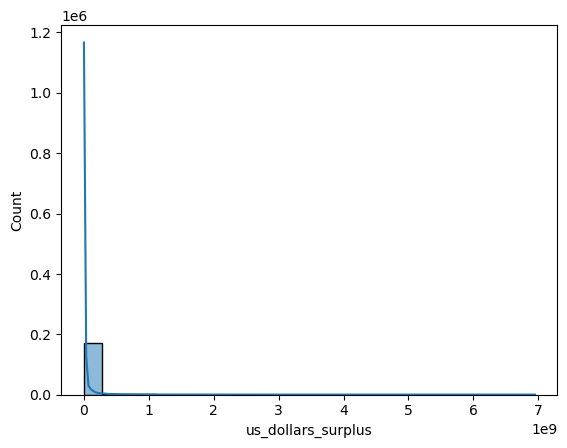

In [17]:
# Extreme value checks 'us_dollars_surplus'
sns.histplot(df['us_dollars_surplus'], bins= 25, kde = True)

<Axes: xlabel='tons_waste', ylabel='Count'>

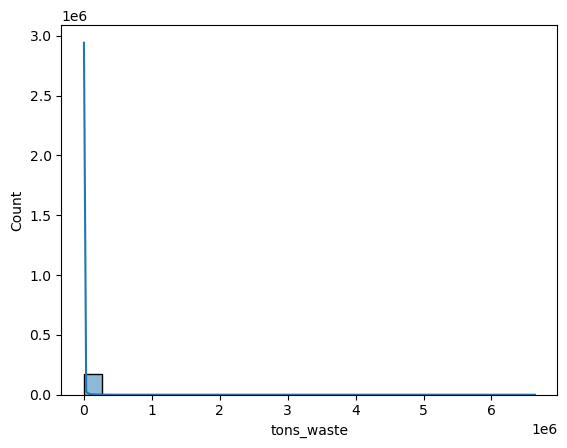

In [18]:
# Extreme value checks 'tons_waste'
sns.histplot(df['tons_waste'], bins= 25, kde = True)

<Axes: xlabel='total_mtco2e_footprint', ylabel='Count'>

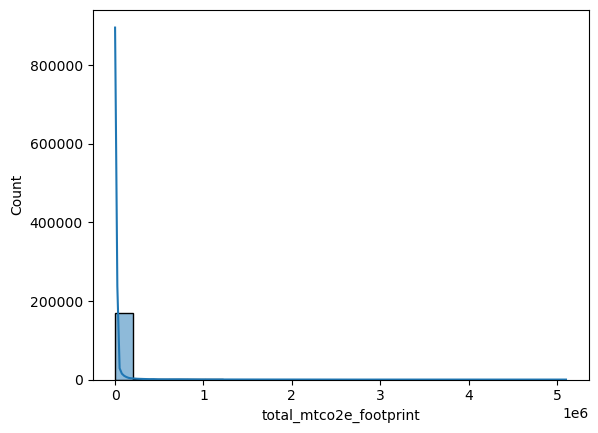

In [19]:
# Extreme value checks 'total_mtco2e_footprint'
sns.histplot(df['total_mtco2e_footprint'], bins= 25, kde = True)

<Axes: xlabel='gallons_water_footprint', ylabel='Count'>

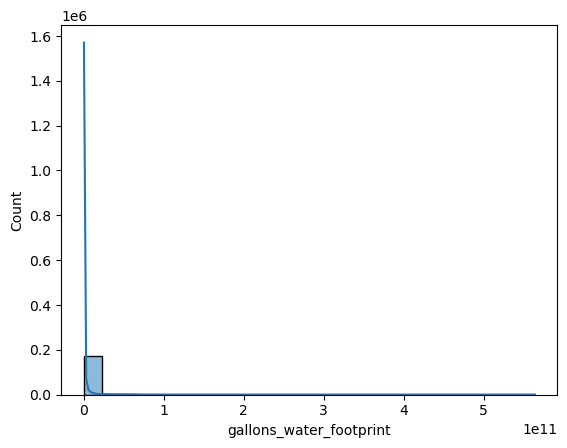

In [20]:
# Extreme value checks 'gallons_water_footprint'
sns.histplot(df['gallons_water_footprint'], bins= 25, kde = True)

No extreme values

## 04. Create Choropleth Maps

#### Choropleth map of average surplus in dollar value by state

In [21]:
# Create subset with just the 'state' and 'us_dollars_surplus'
df_dollars = df[['state', 'us_dollars_surplus']]
df_dollars.head()

,state,us_dollars_surplus
0,Alabama,3.883810e+06
1,Alabama,1.586598e+07
2,Alabama,2.527011e+04
3,Alabama,1.279831e+04
4,Alabama,1.471922e+04


In [22]:
# Find average surplus in dollar value for each state
df_dollars_avg = df_dollars.groupby(['state'], as_index=False)['us_dollars_surplus'].mean()

In [23]:
df_dollars_avg.head()

,state,us_dollars_surplus
0,Alabama,1.865966e+07
1,Alaska,3.374186e+06
2,Arizona,2.916596e+07
3,Arkansas,1.167862e+07
4,California,1.555181e+08


In [24]:
# Setup a folium map at a high-level zoom
map01 = folium.Map(location = [37, -97], zoom_start = 3.5)

folium.Choropleth(
    geo_data = country_geo,
    data = df_dollars_avg,
    columns = ['state', 'us_dollars_surplus'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.75, line_opacity=0.1,
    legend_name = 'average surplus in us dollars').add_to(map01)
folium.LayerControl().add_to(map01)

map01

In [25]:
map01.save('plot_01_data.html')

#### Choropleth map of average total metric ton of carbon emission by state

In [26]:
# Create subset with just the 'state' and 'total_mtco2e_footprint'
df_mtco2e = df[['state', 'total_mtco2e_footprint']]
df_mtco2e.head()

,state,total_mtco2e_footprint
0,Alabama,34696.134990
1,Alabama,13737.376590
2,Alabama,19.255983
3,Alabama,12.544176
4,Alabama,17.633195


In [27]:
# Find average tons of waste for each state
df_mtco2e_avg = df_mtco2e.groupby(['state'], as_index=False)['total_mtco2e_footprint'].mean()

In [28]:
df_mtco2e_avg.head()

,state,total_mtco2e_footprint
0,Alabama,18494.380281
1,Alaska,2899.816014
2,Arizona,27226.612468
3,Arkansas,12906.523702
4,California,123076.626484


In [29]:
# Setup a folium map at a high-level zoom
map02 = folium.Map(location = [37, -97], zoom_start = 3.5)

folium.Choropleth(
    geo_data = country_geo,
    data = df_mtco2e_avg,
    columns = ['state', 'total_mtco2e_footprint'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.75, line_opacity=0.1,
    legend_name = 'average total metric ton of carbon emission').add_to(map02)
folium.LayerControl().add_to(map02)

map02

In [30]:
map02.save('plot_02_data.html')

## 05. Results

Both choropleth maps show that the states with the highest average surplus in US dollars also had the highest average total metric ton of carbon emissions. The most obvious one is California followed by Texas and Florida. Interestingly, it seems that the East coast has higher average surplus in US dollars and accordingly higher average total mtco2e than the West coast. <br>

**New research questions** <br>

* In the states are there significant changes in carbon emissions over time? <br>

* Which region has the highest surplus and accordingly the highest carbon emissions? <br>

* Why do certain states have a higher surplus than others? Is it due to population? The industries in the state?
Popular types of food/restaurants?


